In [1]:
import pickle
import sys
import os
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3dPU/3dPU/")
from Final_surface import *
from _3DLoops._3dpu import *
from PointList import *
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [2]:
from Block_edges.block_edges import *

In [3]:
# upload the loops. 

with open("/home/mehdii/projects/def-vidalthi/mehdii/3dPU/3dPU/Created_Loops/created_loops_artificial.pkl",'rb') as file:
    loops = pickle.load(file)
loops_3D = []
for loop in tqdm(loops):
    if True:
        C = PointList()
        for r in loop.loop[:-1]:
            pos = [r.res.ax] + list(r.res.pos)
            if pos[0] == 2:
                new_pos = [pos[1]+0.5,pos[2] + 0.5,pos[3]]
            elif pos[0] == 1:
                new_pos = [pos[1]+0.5,pos[2],pos[3]+0.5]
            elif pos[0] == 0:
                new_pos = [pos[1],pos[2] + 0.5,pos[3]+0.5]
                
            C.add_point(new_pos)
    loops_3D.append(C)



100%|██████████| 915/915 [00:00<00:00, 35351.77it/s]


In [45]:
Bad_Meshes = []
epsilon = 0.01
for polygone in tqdm(loops_3D):
    if len(polygone.points) < 6:
        Nbre = len(polygone.points)
    else:
        Nbre = 5*len(polygone.points)
    M = Edge_Flipping(polygone,Nbre)
    
# M.add_points_to_boundary(N = 5)
    M.create_quadrilaterals()
    M.split_quadrilateral()
    J = M
    M.canonic_representation_from_mesh()
    M.fill_edges()
    area = M.calculate_area()
    # M.update_weights()
    # for i in (M.inside_indexes):
    #     M.update_mapping(i)
    # D = M.lawson_flip()
    # new_area = M.calculate_area()
    # while  area - new_area > 0.01:
    #     area = M.calculate_area()
    #     M.update_weights()
    #     for i in (M.inside_indexes):
    #         M.update_mapping(i)
    #     M.lawson_flip()
    #     new_area = M.calculate_area()
    Bad_Meshes.append(M)


100%|██████████| 915/915 [00:00<00:00, 2568.38it/s]


In [81]:
cpt

760

In [82]:
# Blocked_edges_bad = []
# cpt = 0
for m in tqdm(Bad_Meshes[764:]):
    C = Block_edges(m.triangles,m.mapping)
    C.block_all_the_edges()
    K = [(tuple(P[0]),tuple(P[1])) for P in C.blocked_edges]
    Blocked_edges_bad = list(set(Blocked_edges_bad + K))
    cpt = cpt + 1
    
    

100%|██████████| 151/151 [00:01<00:00, 127.99it/s]


In [85]:
len(Blocked_edges_bad)

1541

In [40]:
k = np.argmax(np.array([len(l.loop) for l in loops]))
# polygone = loops_3D[k]
# if len(polygone.points) < 6:
#     Nbre = len(polygone.points)
# else:
#     Nbre = 5*len(polygone.points)
# M = Edge_Flipping(polygone,Nbre)
# M.create_quadrilaterals()
# M.split_quadrilateral()
# M.canonic_representation_from_mesh()
# M.fill_edges()
M = Meshes[k]
C = Block_edges(M.triangles,M.mapping)
C.block_all_the_edges()
edges_m =  [(tuple(P[0]),tuple(P[1])) for P in C.blocked_edges]
len(edges_m)


yes


41

In [44]:
M.calculate_area()

25.823380214814648

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1041,) + inhomogeneous part.

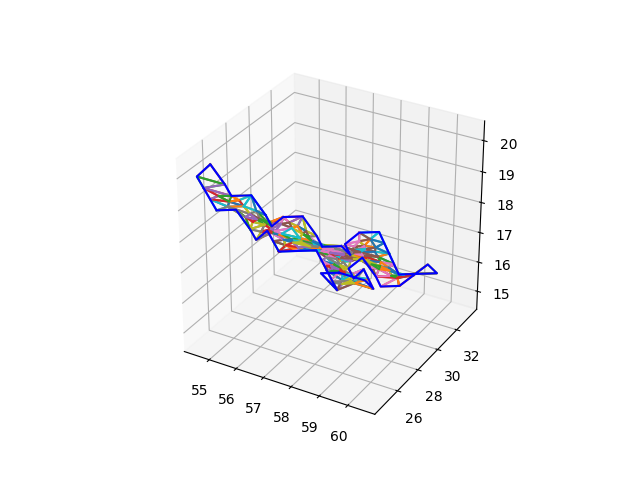

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
J = M
X = []
Y = []
Z = []
# for J in Meshes:
for tr in J.triangles:
    xs = [J.mapping[ind][0] for ind in tr] + [J.mapping[tr[0]][0]]
    ys = [J.mapping[ind][1] for ind in tr] + [J.mapping[tr[0]][1]]
    zs = [J.mapping[ind][2] for ind in tr] + [J.mapping[tr[0]][2]]
    ax.plot(xs,ys,zs)
    
    X = X + list(xs)
    Y = Y + list(ys)
    Z = Z + list(zs)

# for edge in edges_m:
#     x = [edge[0][0], edge[1][0]]
#     y = [edge[0][1], edge[1][1]]
#     z = [edge[0][2], edge[1][2]]
#     ax.plot(x, y, z, color ="black")

x,y,z = [],[],[]
for k in J.boundary.points:
    L =  k
    x.append(L[0])
    y.append(L[1])
    z.append(L[2])


plt.plot(x+[x[0]],y+[y[0]],z+[z[0]],color='blue') 

X.append(x)
Y.append(y)
Z.append(z)




X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)


In [86]:
import numpy as np

def unwrap_voxel(current_voxel, neighbor_voxel, W):
    return neighbor_voxel - 2 * np.pi * W(current_voxel - neighbor_voxel)

def edge_forbidden(current, neighbor, forbidden_edges):
    # Check if the edge between current and neighbor is forbidden
    return (current, neighbor) in forbidden_edges or (neighbor, current) in forbidden_edges

def is_valid_neighbor(i, j, k, current, forbidden_edges, visited, shape):
    neighbor = (i, j, k)
    return 0 <= i < shape[0] and 0 <= j < shape[1] and 0 <= k < shape[2] and not edge_forbidden(current, neighbor, forbidden_edges) and not visited[i][j][k]

def flood_fill_unwrap(phi, W, forbidden_edges, start):
    stack = [start]
    visited = np.zeros_like(phi, dtype=bool)
    Phi = np.copy(phi)  # Initialize unwrapped phase volume
    shape = phi.shape

    while stack:
        current = stack.pop()
        i, j, k = current
        if visited[i][j][k]:
            continue
        visited[i][j][k] = True

        # Unwrap each neighbor and add to stack if valid
        for di, dj, dk in [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]:
            ni, nj, nk = i + di, j + dj, k + dk
            neighbor = (ni, nj, nk)
            if is_valid_neighbor(ni, nj, nk, current, forbidden_edges, visited, shape):
                Phi[ni][nj][nk] = unwrap_voxel(Phi[i][j][k], phi[ni][nj][nk], W)
                stack.append(neighbor)

    return Phi
def W(phase_diff):

    # Normalize the phase difference to be within the range [-pi, pi]
    normalized_diff = np.mod(phase_diff + np.pi, 2 * np.pi) - np.pi
    
    # Determine the number of 2π cycles to add
    return np.round(normalized_diff / (2 * np.pi))


In [87]:
with open('/home/mehdii/projects/def-vidalthi/mehdii/3dPU/3dPU/Data/artificial_data/data_ball_wrapped.pkl',"rb") as file:
    phi_wrapped = pickle.load(file)

In [ ]:
flood_fill_unwrap(phi_wrapped,)